In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque, defaultdict

Playing around with the economics/probability problem described here https://www.jasoncollins.blog/posts/ergodicity-economics-a-primer

In [2]:
class Node:
    def __init__(self, v, left=None, right=None):
        self.v = v
        self.left = left
        self.right = right

heads_gain = 1.8
tails_loss = 0.5

class BinaryTree:
    def __init__(self, n_flips=0, heads_gain=1.8, tails_loss=0.5):
        self.head = Node(1)  # start with $1
        self.n_flips = n_flips
        self.heads_gain = heads_gain
        self.tails_loss = tails_loss
        
        self.dist = defaultdict(list)  # outcomes by number of flips
        
        q = deque([self.head])
        for nth in range(n_flips + 1):
            
            size = len(q)
            for _ in range(size):
                node = q.popleft()
                self.dist[nth].append(node.v)

                # left branch is tails
                node.left = Node(node.v * self.tails_loss)
                q.append(node.left)

                # right branch is heads
                node.right = Node(node.v * self.heads_gain)
                q.append(node.right)

tree = BinaryTree(n_flips=10)
len(tree.dist[10])
    

1024

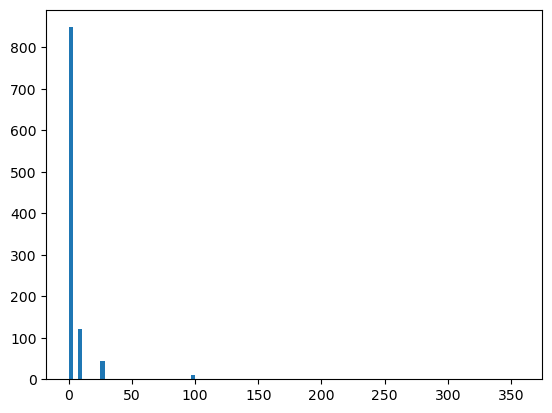

In [3]:
plt.hist(tree.dist[10], bins=100)
plt.show()

In [4]:
percentiles = np.percentile(tree.dist[10], [i for i in range(5, 100, 5)])
percentiles

array([1.26562500e-02, 4.55625000e-02, 4.55625000e-02, 1.64025000e-01,
       1.64025000e-01, 1.64025000e-01, 1.64025000e-01, 5.90490000e-01,
       5.90490000e-01, 5.90490000e-01, 5.90490000e-01, 5.90490000e-01,
       2.12576400e+00, 2.12576400e+00, 2.12576400e+00, 2.12576400e+00,
       7.65275040e+00, 7.65275040e+00, 2.75499014e+01])

In [5]:
percentiles < 1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False])

In [6]:
np.percentile(tree.dist[10], 50)

0.5904900000000002

In [7]:
np.percentile(tree.dist[10], 60), np.percentile(tree.dist[10], 65)

(0.5904900000000002, 2.1257640000000007)

In [ ]:
# for 10 flips, the median is $0.59, less than what you started.

In [8]:
for n_flips in tree.dist:
    dist = tree.dist[n_flips]
    print(f'After {n_flips}, the min, mean, median, max dollar amount is {np.min(dist), np.mean(dist), np.median(dist), np.max(dist)}.')

After 0, the min, mean, median, max dollar amount is (1, 1.0, 1.0, 1).
After 1, the min, mean, median, max dollar amount is (0.5, 1.15, 1.15, 1.8).
After 2, the min, mean, median, max dollar amount is (0.25, 1.3225, 0.9, 3.24).
After 3, the min, mean, median, max dollar amount is (0.125, 1.5208750000000002, 1.0350000000000001, 5.832000000000001).
After 4, the min, mean, median, max dollar amount is (0.0625, 1.7490062500000003, 0.81, 10.497600000000002).
After 5, the min, mean, median, max dollar amount is (0.03125, 2.0113571875000007, 0.9315000000000001, 18.895680000000006).
After 6, the min, mean, median, max dollar amount is (0.015625, 2.313060765625001, 0.7290000000000001, 34.01222400000001).
After 7, the min, mean, median, max dollar amount is (0.0078125, 2.6600198804687505, 0.8383500000000002, 61.22200320000002).
After 8, the min, mean, median, max dollar amount is (0.00390625, 3.0590228625390634, 0.6561000000000001, 110.19960576000004).
After 9, the min, mean, median, max dollar 